In [174]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [175]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [176]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [177]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [178]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [179]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | raudeberg
Processing Record 2 of Set 1 | buqayq
City not found. Skipping...
Processing Record 3 of Set 1 | yei
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | yelizovo
Processing Record 10 of Set 1 | thinadhoo
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | kimbe
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set

Processing Record 39 of Set 4 | williams lake
Processing Record 40 of Set 4 | san carlos
Processing Record 41 of Set 4 | guaruja
Processing Record 42 of Set 4 | dauphin
Processing Record 43 of Set 4 | ciudad bolivar
Processing Record 44 of Set 4 | burnie
Processing Record 45 of Set 4 | bonao
Processing Record 46 of Set 4 | wahpeton
Processing Record 47 of Set 4 | ornskoldsvik
Processing Record 48 of Set 4 | twentynine palms
Processing Record 49 of Set 4 | tuatapere
Processing Record 50 of Set 4 | utiroa
City not found. Skipping...
Processing Record 1 of Set 5 | avera
Processing Record 2 of Set 5 | havre-saint-pierre
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | sao joao de pirabas
Processing Record 6 of Set 5 | sao filipe
Processing Record 7 of Set 5 | kieta
Processing Record 8 of Set 5 | el dorado
Processing Record 9 of Set 5 | chuy
Processing Record 10 of Set 5 | axim
Processing Record 11 of Set 5 | portobelo
Proce

Processing Record 28 of Set 8 | tocopilla
Processing Record 29 of Set 8 | weiser
Processing Record 30 of Set 8 | lokoja
Processing Record 31 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 32 of Set 8 | shatsk
Processing Record 33 of Set 8 | bridgetown
Processing Record 34 of Set 8 | mahibadhoo
Processing Record 35 of Set 8 | mezen
Processing Record 36 of Set 8 | port-gentil
Processing Record 37 of Set 8 | ponta delgada
Processing Record 38 of Set 8 | zhuji
Processing Record 39 of Set 8 | andrushivka
Processing Record 40 of Set 8 | stornoway
Processing Record 41 of Set 8 | cururupu
Processing Record 42 of Set 8 | kigoma
Processing Record 43 of Set 8 | maningrida
Processing Record 44 of Set 8 | pangnirtung
Processing Record 45 of Set 8 | nortelandia
Processing Record 46 of Set 8 | kargat
Processing Record 47 of Set 8 | rehoboth
Processing Record 48 of Set 8 | khandyga
Processing Record 49 of Set 8 | ginir
Processing Record 50 of Set 8 | aneho
Processing Record 1 of 

Processing Record 10 of Set 12 | nouadhibou
Processing Record 11 of Set 12 | contai
Processing Record 12 of Set 12 | praya
Processing Record 13 of Set 12 | jinchang
Processing Record 14 of Set 12 | hofn
Processing Record 15 of Set 12 | zhigansk
Processing Record 16 of Set 12 | sampit
Processing Record 17 of Set 12 | uk
City not found. Skipping...
Processing Record 18 of Set 12 | kwinana
Processing Record 19 of Set 12 | chagda
City not found. Skipping...
Processing Record 20 of Set 12 | lamesa
Processing Record 21 of Set 12 | harper
Processing Record 22 of Set 12 | hirara
Processing Record 23 of Set 12 | kozhva
Processing Record 24 of Set 12 | grindavik
Processing Record 25 of Set 12 | bandar-e lengeh
Processing Record 26 of Set 12 | khabary
Processing Record 27 of Set 12 | whitecourt
Processing Record 28 of Set 12 | lurgan
Processing Record 29 of Set 12 | takoradi
Processing Record 30 of Set 12 | esmeraldas
Processing Record 31 of Set 12 | pueblo nuevo
Processing Record 32 of Set 12 | 

In [180]:
len(city_data)

561

In [181]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Raudeberg,61.9875,5.1352,51.19,82,100,6.93,NO,2021-08-04 03:04:11
1,Yei,4.0950,30.6779,64.13,95,48,2.53,SS,2021-08-04 03:04:11
2,Tasiilaq,65.6145,-37.6368,44.76,86,100,2.51,GL,2021-08-04 03:04:12
3,Punta Arenas,-53.1500,-70.9167,42.12,75,90,9.22,CL,2021-08-04 03:04:12
4,Mar Del Plata,-38.0023,-57.5575,54.12,53,75,1.99,AR,2021-08-04 03:04:13
...,...,...,...,...,...,...,...,...,...
556,Ruteng,-8.6136,120.4721,74.23,57,100,1.70,ID,2021-08-04 03:07:28
557,Kyshtovka,56.5550,76.6271,62.38,86,88,7.52,RU,2021-08-04 03:07:28
558,Tikapur,28.5000,81.1333,84.02,79,94,4.36,NP,2021-08-04 03:03:39
559,Ganzhou,28.8184,115.4327,91.06,62,83,11.41,CN,2021-08-04 03:07:28


In [182]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Raudeberg,NO,2021-08-04 03:04:11,61.9875,5.1352,51.19,82,100,6.93
1,Yei,SS,2021-08-04 03:04:11,4.0950,30.6779,64.13,95,48,2.53
2,Tasiilaq,GL,2021-08-04 03:04:12,65.6145,-37.6368,44.76,86,100,2.51
3,Punta Arenas,CL,2021-08-04 03:04:12,-53.1500,-70.9167,42.12,75,90,9.22
4,Mar Del Plata,AR,2021-08-04 03:04:13,-38.0023,-57.5575,54.12,53,75,1.99
...,...,...,...,...,...,...,...,...,...
556,Ruteng,ID,2021-08-04 03:07:28,-8.6136,120.4721,74.23,57,100,1.70
557,Kyshtovka,RU,2021-08-04 03:07:28,56.5550,76.6271,62.38,86,88,7.52
558,Tikapur,NP,2021-08-04 03:03:39,28.5000,81.1333,84.02,79,94,4.36
559,Ganzhou,CN,2021-08-04 03:07:28,28.8184,115.4327,91.06,62,83,11.41


In [183]:
# Create the output file (CSV).
output_data_file = "weather_data.csv"
# Export the City_Data into a CSV, that header will be present in the DataFrame
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [184]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [185]:
import time

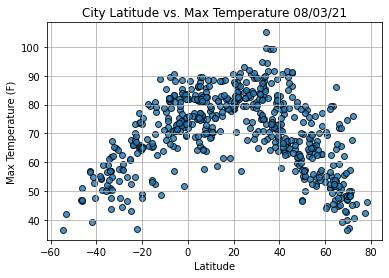

In [186]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

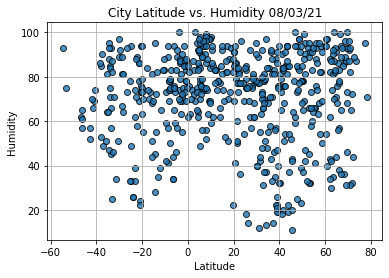

In [187]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

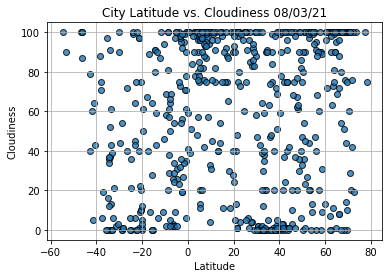

In [188]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig3.png")

# Show plot.
plt.show()

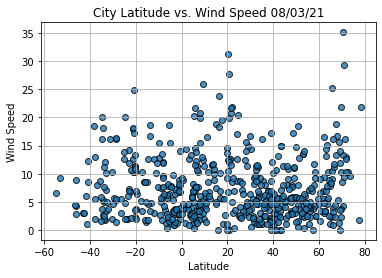

In [189]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig4.png")

# Show plot.
plt.show()

In [190]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [191]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.2f}.")

In [192]:
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Country                        ZA
Date          2021-08-04 03:04:16
Lat                      -33.5906
Lng                        26.891
Max Temp                    61.93
Humidity                       45
Cloudiness                      0
Wind Speed                  12.08
Name: 13, dtype: object

In [193]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
556    False
557     True
558     True
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [194]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Raudeberg,NO,2021-08-04 03:04:11,61.9875,5.1352,51.19,82,100,6.93
1,Yei,SS,2021-08-04 03:04:11,4.0950,30.6779,64.13,95,48,2.53
2,Tasiilaq,GL,2021-08-04 03:04:12,65.6145,-37.6368,44.76,86,100,2.51
5,Georgetown,MY,2021-08-04 03:01:31,5.4112,100.3354,87.89,77,20,2.30
7,Yelizovo,RU,2021-08-04 03:04:14,53.1873,158.3805,68.14,32,20,13.42


In [195]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

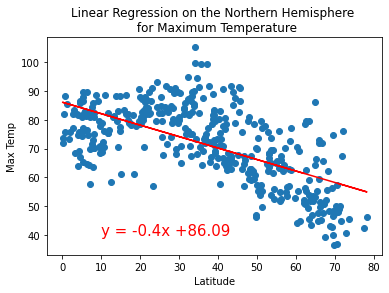

The r-value is -0.63.


In [196]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

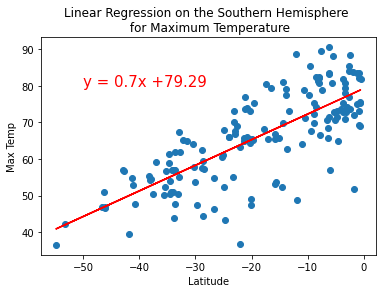

The r-value is 0.77.


In [197]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,80))

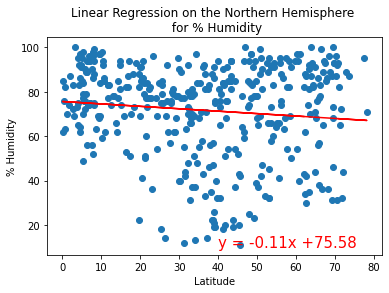

The r-value is -0.11.


In [198]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

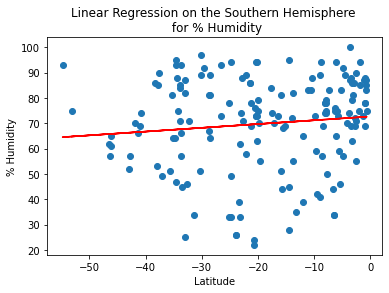

The r-value is 0.11.


In [199]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", "% Humidity", (-50,15))

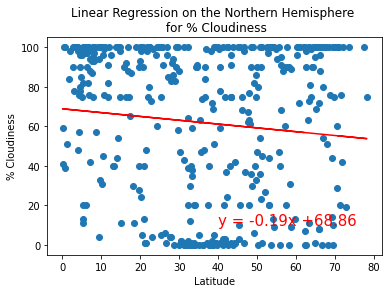

The r-value is -0.11.


In [200]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

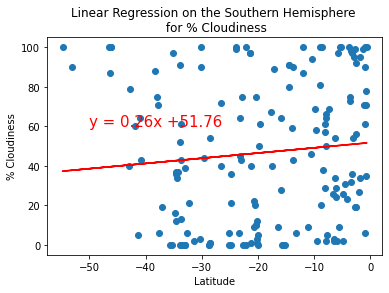

The r-value is 0.10.


In [201]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

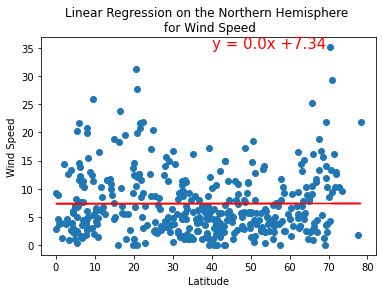

The r-value is 0.00.


In [202]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

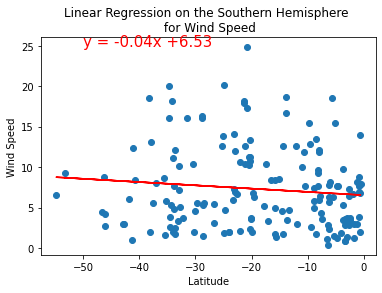

The r-value is -0.11.


In [203]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))